##Лабораторная работа №2
##по численным методам
###Работу выполнила: Хренникова Ангелина
###Группа: М8О-308Б-19
####Вариант: 20

Задание: Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций.

tg x + 5 x^2 + 1 = 0, x = [-1; 1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import arange
from numpy import meshgrid
from numpy.linalg import solve

In [ ]:
def f(x):
  if (x < -1 or x > 1):
        raise Exception("x вне области определения")
  return np.tan(x) - 5 * x * x + 1

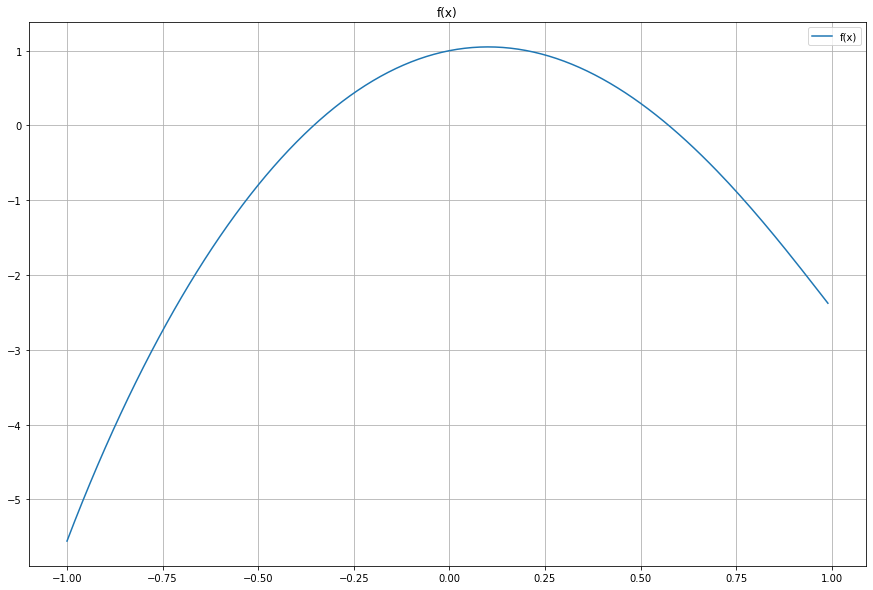

In [ ]:
xmin = -1
xmax = 1
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x)')
plt.plot(xarr, ylist)
plt.legend(['f(x)'])
plt.show()

In [ ]:
def f1(x):
    if (x < -1 or x > 1):
        raise Exception("x вне области определения")
    return np.tan(x)

def f2(x):
    return 5 * x * x - 1

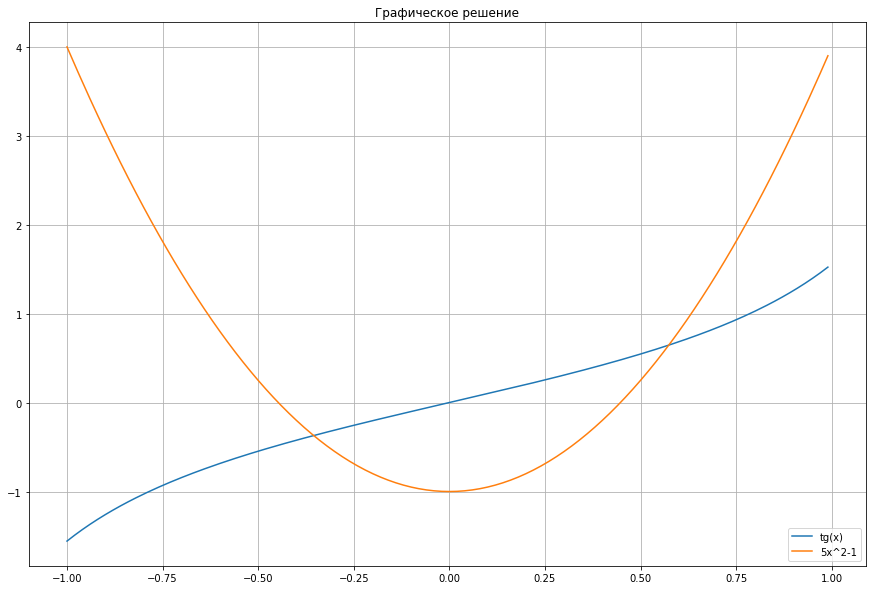

In [ ]:
xarr = np.arange(xmin, xmax, dx)
ylist1 = [f1(x) for x in xarr]
ylist2 = [f2(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('Графическое решение')
plt.plot(xarr, ylist1)
plt.plot(xarr, ylist2)
plt.legend(['tg(x)', '5x^2-1'])
plt.show()

In [ ]:
def df(x):
    if (x < -1 or x > 1):
        raise Exception("x вне области определения")
    return (1/np.cos(x)) ** 2 - 10 * x
 

def ddf(x):
    if x == -2:
        raise Exception("x вне области определения")
    return 2 * ((1/np.cos(x)) ** 2) * np.tan(x) - 10

In [ ]:
def phi(x):
    if (x < -1 or x > 1):
        raise Exception("x вне области определения")
    return math.sqrt((np.tan(x)+1) / 5)
 

def dphi(x):
    if (x < -1 or x > 1) or (math.sqrt((np.tan(x)+1) / 5) == 0):
        raise Exception("x вне области определения")
    return 1 / (2 * math.sqrt(5) * math.sqrt(np.tan(x)+1) * np.cos(x) * np.cos(x))
    

In [ ]:
def iteration_method(a, b, eps):
    def get_max_change(a, b):
        return max( abs(dphi(a)), abs(dphi(b)) )

    x = x_prev = (a + b) / 2
    q = get_max_change(a, b)

    if (q >= 1):
        return None

    iter = 0
    while iter <= 1000:
        iter += 1
        x = phi(x_prev)
        error = q / (1 - q) * abs(x - x_prev)
        if (error <= eps):
            break
        x_prev = x

    return x, iter

In [ ]:
def newton_method(a, b, eps):
    def get_max_change(a, b):
        return max( abs(df(a)), abs(df(b)) )

    def get_max_rate(a, b):
        return max( abs(ddf(a)), abs(ddf(b)) )

    x = x_prev = (a + b) / 2
    M = get_max_rate(a, b)
    m = get_max_change(a, b)
    c = M / (2 * m)

    iter = 0
    while iter <= 1000:
        iter += 1
        x = x_prev - f(x_prev)/df(x_prev)
        error = (x - x_prev)**2 * c
        if (error <= eps):
            break
        x_prev = x
    return x, iter

In [ ]:
eps = 1e-5

a, b = 0, 0.6
print("Iteration method:", iteration_method(a, b, eps))
print("Newton method:", newton_method(a, b, eps))

Задание: Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций. 
a = 2
\begin{equation*}
 \begin{cases}
   {x_1}^2 - 2lgx_2 - 1 = 0 &\\
   {x_1}^2 - ax_1x_2 + a = 0
 \end{cases}
\end{equation*}

In [ ]:
def f1(x):
    return (x[0] * x[0]) - 2 * np.log10(x[1]) - 1

def f2(x):
    return (x[0] * x[0]) - A * x[0] * x[1] + A

A = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


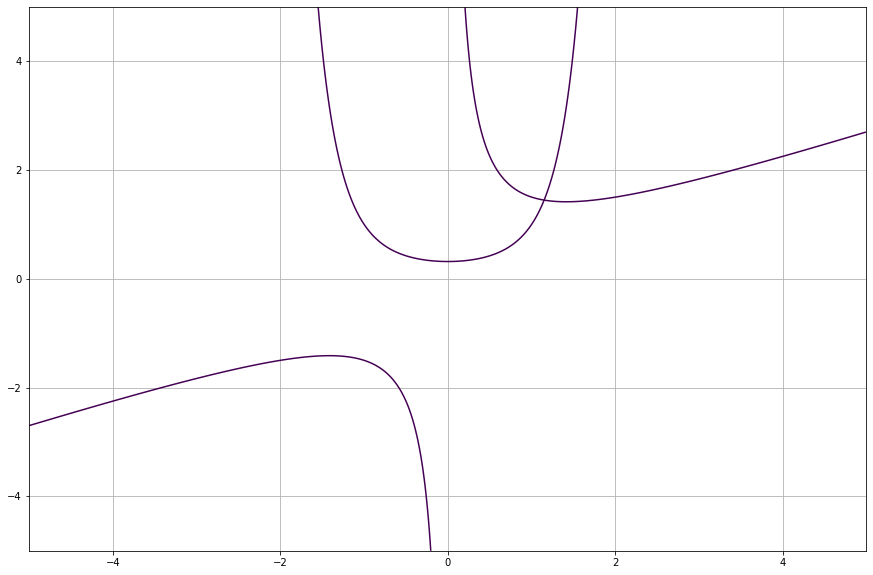

In [ ]:
xmin = -5
xmax = 5
dx = 0.01

xrange = arange(xmin, xmax, dx)
yrange = arange(xmin, xmax, dx)
X = meshgrid(xrange, yrange)
F1 = f1(X) 
F2 = f2(X) 

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.contour(X[0], X[1], F1, [0])
plt.contour(X[0], X[1], F2, [0])

plt.show()

In [ ]:
def df1_dx2(x):
    return -2 / (np.log(10) * x[1])
 
def df1_dx1(x):
    return 2 * x[0]
 
def df2_dx1(x):
    return 2 * x[0] - A * x[1]
 
def df2_dx2(x):
    return -A * x[0]

In [ ]:
def phi1(x):
    return math.sqrt(2 * np.log10(x[1]) + 1)

def phi2(x):
    return (A + x[0] * x[0])/(A * x[0])
 
def dphi1_dx1(x):
    return 0
 
def dphi1_dx2(x):
    return 1 / (np.log(10) * x[1] * math.sqrt(2 * np.log10(x[1]) + 1))
 
def dphi2_dx1(x):
    return (x[0] * x[0] - A)/(A * x[0])
 
def dphi2_dx2(x):
    return 0

In [ ]:
def norm(x, x_prev):
    return math.sqrt(sum([(xn - xp) ** 2 for xn, xp in zip(x, x_prev)]))

In [ ]:
def iteration_method(a, b, eps):
    def get_phi_norm(x):
        return max(abs(dphi1_dx1(x)) + abs(dphi1_dx2(x)),
                   abs(dphi2_dx1(x)) + abs(dphi2_dx2(x)))

    x0_interv = [a[0], b[0]]
    x1_interv = [a[1], b[1]]

    x_prev = [
            (x0_interv[1] + x0_interv[0]) / 2,
            (x1_interv[1] + x1_interv[0]) / 2
    ]

    q = get_phi_norm(x_prev)
    if (q >= 1):
        return None
    iter_no = 0
    while iter_no <= 1000:
        iter_no += 1
        x = [phi1(x_prev), phi2(x_prev)]
        error = q / (1 - q) * norm(x, x_prev)
        if (error <= eps):
            break
        x_prev = x
    return x, iter_no

In [ ]:
def newton_method(a, b, eps):

    def jacobi_matrix(x):
        return [
            [df1_dx1(x), df1_dx2(x)],
            [df2_dx1(x), df2_dx2(x)]
        ]

    x0_interv = [a[0], b[0]]
    x1_interv = [a[1], b[1]]

    x_prev = [
            (x0_interv[1] + x0_interv[0]) / 2,
            (x1_interv[1] + x1_interv[0]) / 2
    ]

    iter_no = 0
    while iter_no <= 1000:
        iter_no += 1

        jacobi = np.array(jacobi_matrix(x_prev))
        b = np.array([-f1(x_prev), -f2(x_prev)])
        delta_x = solve(jacobi, b).tolist()
        x = [px + dx for px, dx in zip(x_prev, delta_x)]
        error = norm(x, x_prev)
        if (error <= eps):
            break
        x_prev = x
    return x, iter_no

In [ ]:
eps = 1e-5

a = [0, 0]
b = [2, 2]

print("Iteration method:", iteration_method(a, b, eps))
print("Newton method:", newton_method(a, b, eps))

Iteration method: ([1.148766942202345, 1.444883207628891], 10)
Newton method: ([1.1487666604380293, 1.444882130744528], 4)
